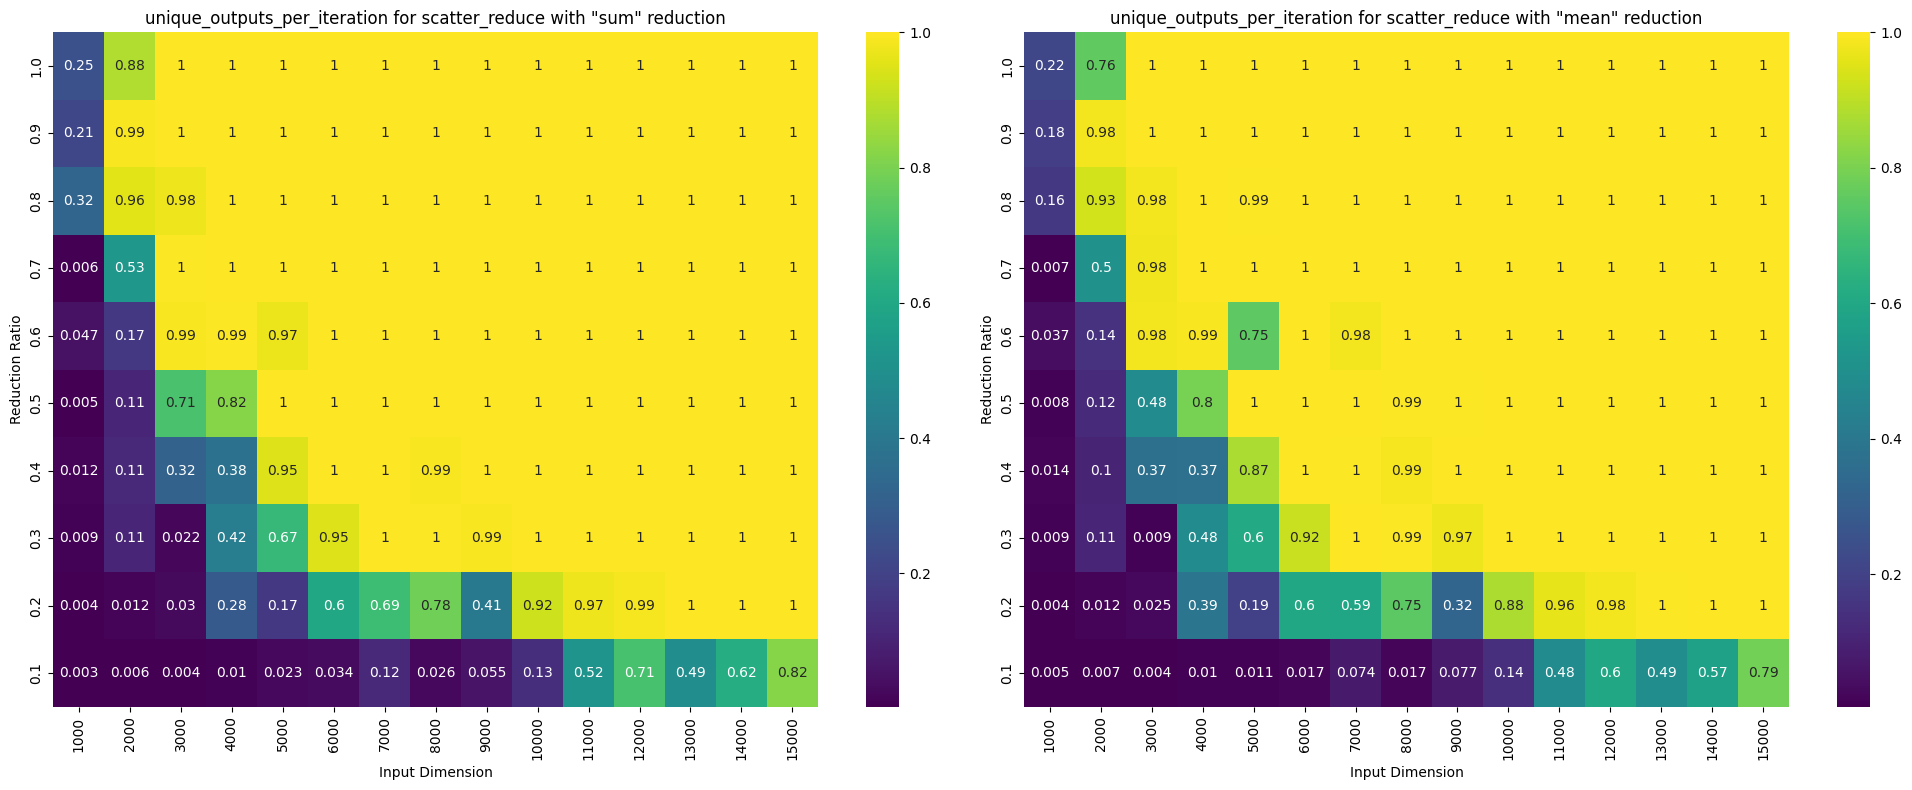

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
df = pd.read_csv('./scatter_reduce_updated.csv')

# Convert input_dimension from string to an appropriate type
df['input_dimension'] = df['input_dimension'].apply(eval)

# Extract the first dimension for simplicity, assuming input dimensions are tuples
df['input_dimension'] = df['input_dimension'].apply(lambda x: x[0])


# Separate the data for 'sum' and 'mean'
df_sum = df[df['reduce'] == 'sum']
df_mean = df[df['reduce'] == 'mean']

# Pivot the DataFrame for 'sum'
heatmap_data_sum = df_sum.pivot_table(values='unique_outputs_per_iteration', index='reduction_ratio', columns='input_dimension', aggfunc='mean')

# Pivot the DataFrame for 'mean'
heatmap_data_mean = df_mean.pivot_table(values='unique_outputs_per_iteration', index='reduction_ratio', columns='input_dimension', aggfunc='mean')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot heatmap for 'sum'
sns.heatmap(heatmap_data_sum, annot=True, cmap='viridis', ax=axes[0])
axes[0].set_title('unique_outputs_per_iteration for scatter_reduce with "sum" reduction')
axes[0].set_xlabel('Input Dimension')
axes[0].set_ylabel('Reduction Ratio')
axes[0].invert_yaxis()

# Plot heatmap for 'mean'
sns.heatmap(heatmap_data_mean, annot=True, cmap='viridis', ax=axes[1])
axes[1].set_title('unique_outputs_per_iteration for scatter_reduce with "mean" reduction')
axes[1].set_xlabel('Input Dimension')
axes[1].set_ylabel('Reduction Ratio')
axes[1].invert_yaxis()

# Adjust layout
plt.tight_layout()
plt.show()


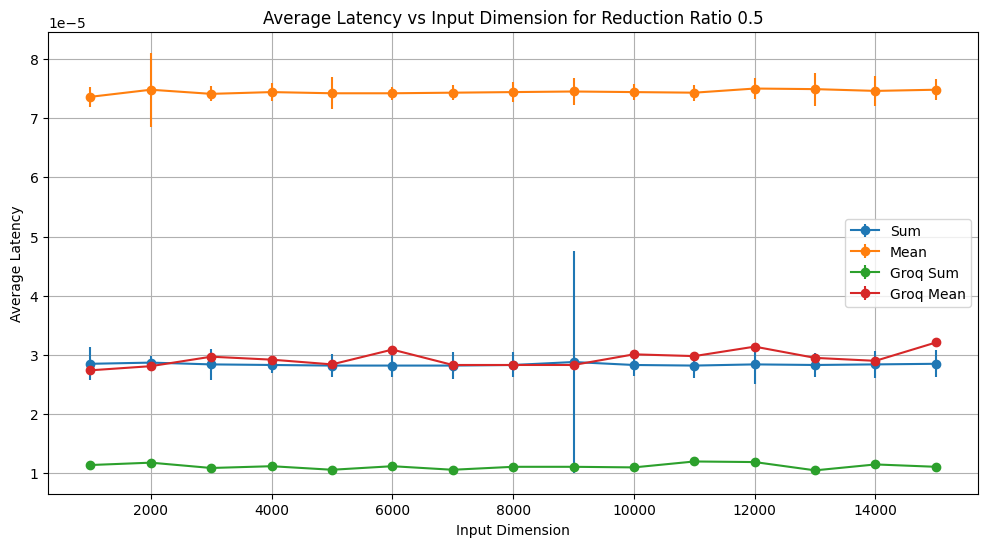

In [37]:
# Filter the data for reduction_ratio=0.5
df_filtered = df[df['reduction_ratio'] == 0.5]

# Separate the data for 'sum' and 'mean'
df_sum = df_filtered[df_filtered['reduce'] == 'sum']
df_mean = df_filtered[df_filtered['reduce'] == 'mean']

# Plot line graph for 'sum' and 'mean'
plt.figure(figsize=(12, 6))

# Plotting sum
plt.errorbar(df_sum['input_dimension'], df_sum['average_latency'], yerr=df_sum['std_dev_latency'], fmt='-o', label='Sum')

# Plotting mean
plt.errorbar(df_mean['input_dimension'], df_mean['average_latency'], yerr=df_mean['std_dev_latency'], fmt='-o', label='Mean')

# Plotting groq sum
plt.errorbar(df_sum['input_dimension'], df_sum['groq_latency'], yerr=df_sum['std_dev_groq_latency'], fmt='-o', label='Groq Sum')

# Plotting groq mean
plt.errorbar(df_mean['input_dimension'], df_mean['groq_latency'], yerr=df_mean['std_dev_groq_latency'], fmt='-o', label='Groq Mean')

plt.xlabel('Input Dimension')
plt.ylabel('Average Latency')
plt.title('Average Latency vs Input Dimension for Reduction Ratio 0.5')
plt.legend()
plt.grid(True)
plt.show()


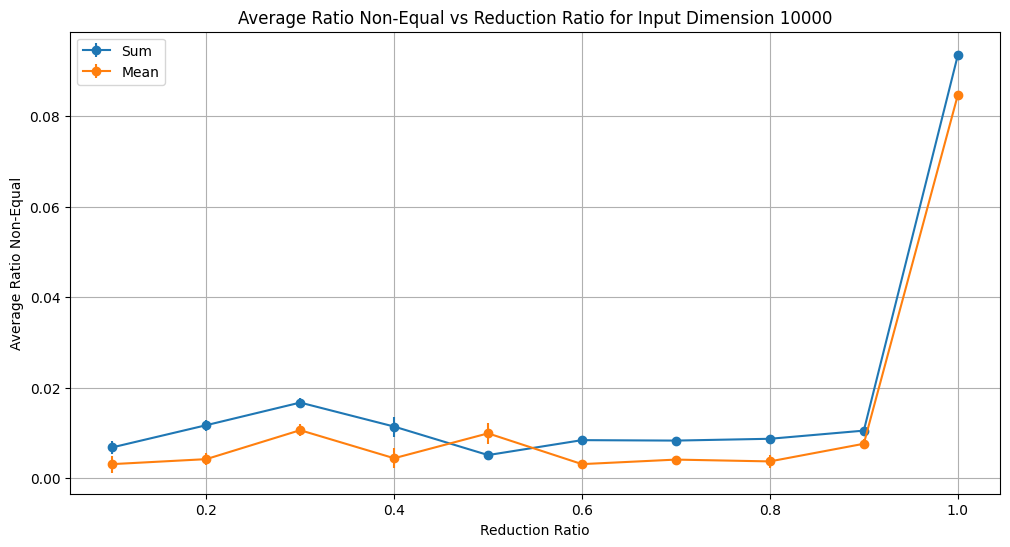

In [38]:
# Function to extract numerical value from tensor representation
def extract_value(tensor_str):
    return float(tensor_str.replace('tensor(', '').replace(')', ''))

# Apply the function to the columns
df['average_ratio_non_equal'] = df['average_ratio_non_equal'].apply(extract_value)
df['std_dev_ratio_non_equal'] = df['std_dev_ratio_non_equal'].apply(extract_value)

# Fix the input dimension, e.g., 100
fixed_input_dimension = 10000
df_filtered = df[df['input_dimension'] == fixed_input_dimension]

# Separate the data for 'sum' and 'mean'
df_sum = df_filtered[df_filtered['reduce'] == 'sum']
df_mean = df_filtered[df_filtered['reduce'] == 'mean']

# Plot line graph for 'sum' and 'mean'
plt.figure(figsize=(12, 6))

# Plotting sum
plt.errorbar(df_sum['reduction_ratio'], df_sum['average_ratio_non_equal'], yerr=df_sum['std_dev_ratio_non_equal'], fmt='-o', label='Sum')

# Plotting mean
plt.errorbar(df_mean['reduction_ratio'], df_mean['average_ratio_non_equal'], yerr=df_mean['std_dev_ratio_non_equal'], fmt='-o', label='Mean')

plt.xlabel('Reduction Ratio')
plt.ylabel('Average Ratio Non-Equal')
plt.title(f'Average Ratio Non-Equal vs Reduction Ratio for Input Dimension {fixed_input_dimension}')
plt.legend()
plt.grid(True)
plt.show()


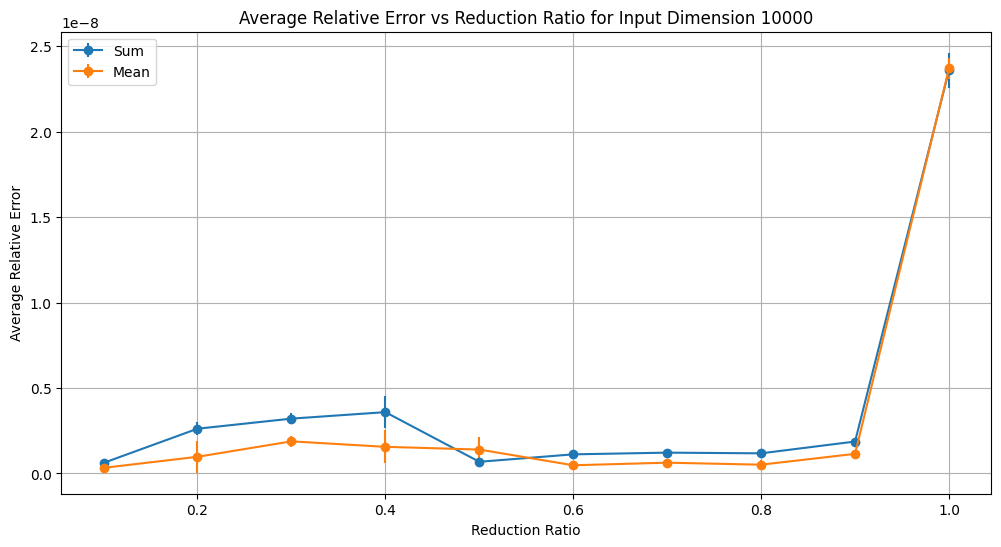

In [39]:
# Function to extract numerical value from tensor representation
def extract_value(tensor_str):
    if isinstance(tensor_str, str):
        return float(tensor_str.replace('tensor(', '').replace(')', ''))
    return tensor_str

# Apply the function to the columns
df['average_relative_error'] = df['average_relative_error'].apply(extract_value)
df['std_dev_relative_error'] = df['std_dev_relative_error'].apply(extract_value)

# Fix the input dimension, e.g., 100
fixed_input_dimension = 10000
df_filtered = df[df['input_dimension'] == fixed_input_dimension]

# Separate the data for 'sum' and 'mean'
df_sum = df_filtered[df_filtered['reduce'] == 'sum']
df_mean = df_filtered[df_filtered['reduce'] == 'mean']

# Plot line graph for 'sum' and 'mean'
plt.figure(figsize=(12, 6))

# Plotting sum
plt.errorbar(df_sum['reduction_ratio'], df_sum['average_relative_error'], yerr=df_sum['std_dev_relative_error'], fmt='-o', label='Sum')

# Plotting mean
plt.errorbar(df_mean['reduction_ratio'], df_mean['average_relative_error'], yerr=df_mean['std_dev_relative_error'], fmt='-o', label='Mean')

plt.xlabel('Reduction Ratio')
plt.ylabel('Average Relative Error')
plt.title(f'Average Relative Error vs Reduction Ratio for Input Dimension {fixed_input_dimension}')
plt.legend()
plt.grid(True)
plt.show()


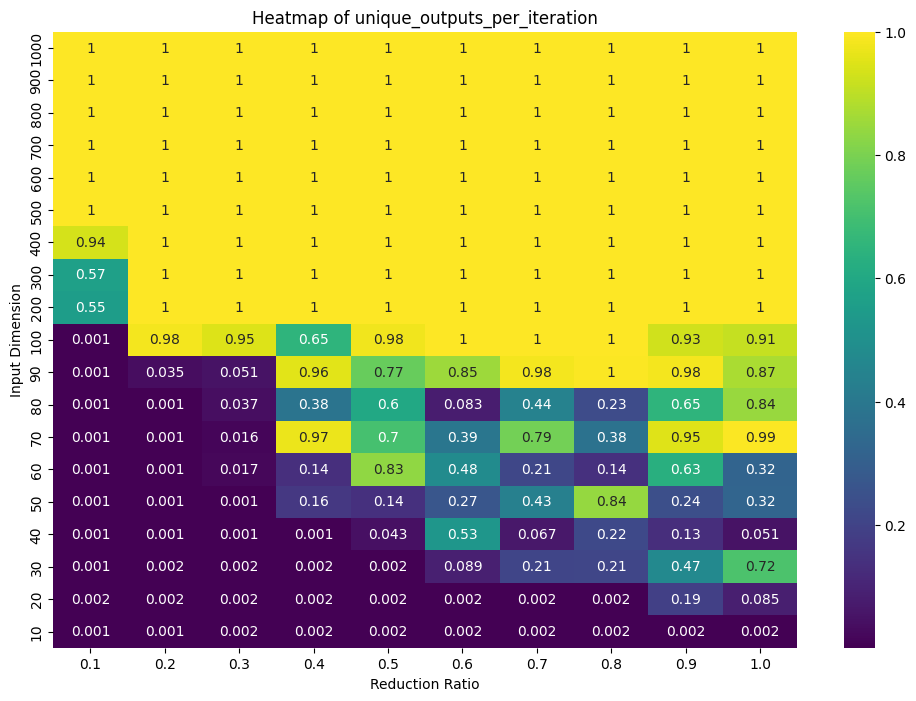

In [68]:
# Load the CSV data into a DataFrame
file_path = 'index_add_updated.csv'  # Replace with your actual CSV file path
df = pd.read_csv(file_path)

# Convert input_dimension from string to an appropriate type and extract the dimension size
df['input_dimension'] = df['input_dimension'].apply(eval).apply(lambda x: x[0])

# Apply the function to the tensor-like columns
df['average_ratio_non_equal'] = df['average_ratio_non_equal'].apply(extract_value)
df['std_dev_ratio_non_equal'] = df['std_dev_ratio_non_equal'].apply(extract_value)

# Pivot the DataFrame for 'unique_outputs_per_iteration' heatmap
heatmap_data = df.pivot_table(values='unique_outputs_per_iteration', index='input_dimension', columns='reduction_ratio', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title('Heatmap of unique_outputs_per_iteration')
plt.xlabel('Reduction Ratio')
plt.ylabel('Input Dimension')
plt.gca().invert_yaxis()  # Invert y-axis to have lower input dimensions at the bottom
plt.show()

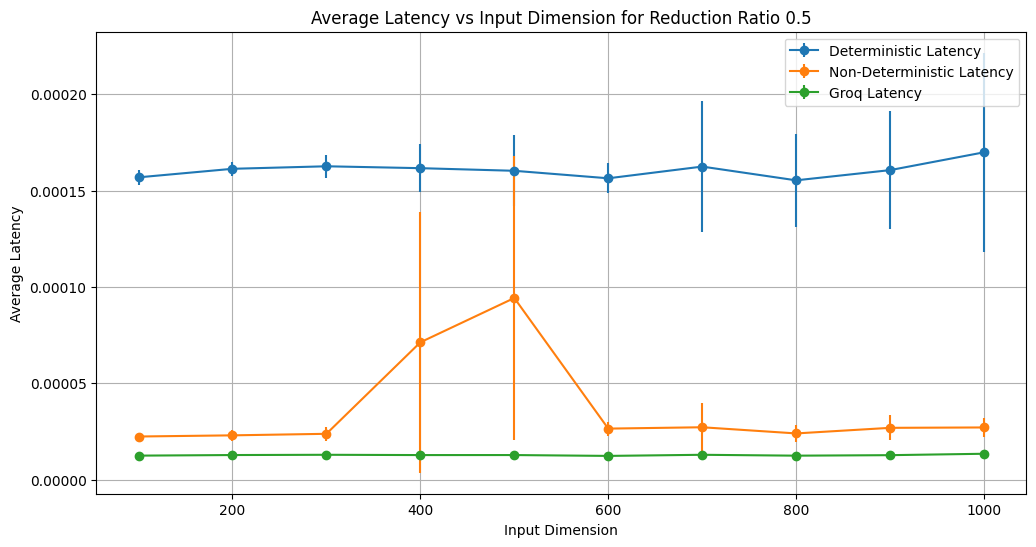

In [69]:
# Extract the first dimension for simplicity, assuming input dimensions are tuples
df['input_dimension'] = df['input_dimension'].apply(lambda x: x if x >= 100 else None)

# Drop rows where input_dimension is None (i.e., dimensions less than (100, 100))
df = df.dropna(subset=['input_dimension'])

# Filter the data for reduction_ratio=0.5
df_filtered = df[(df['reduction_ratio'] == 0.5)]

# Plot line graph for 'average_latency_deterministic' and 'average_latency_non_deterministic' with error bars
plt.figure(figsize=(12, 6))

# Plotting deterministic latency
plt.errorbar(df_filtered['input_dimension'], df_filtered['average_latency_deterministic'], yerr=df_filtered['std_dev_latency_deterministic'], fmt='-o', label='Deterministic Latency')

# Plotting non-deterministic latency
plt.errorbar(df_filtered['input_dimension'], df_filtered['average_latency_non_deterministic'], yerr=df_filtered['std_dev_latency_non_deterministic'], fmt='-o', label='Non-Deterministic Latency')

# Plotting groq latency
plt.errorbar(df_filtered['input_dimension'], df_filtered['groq_latency'], yerr=df_filtered['std_dev_groq_latency'], fmt='-o', label='Groq Latency')

plt.xlabel('Input Dimension')
plt.ylabel('Average Latency')
plt.title('Average Latency vs Input Dimension for Reduction Ratio 0.5')
plt.legend()
plt.grid(True)
plt.show()


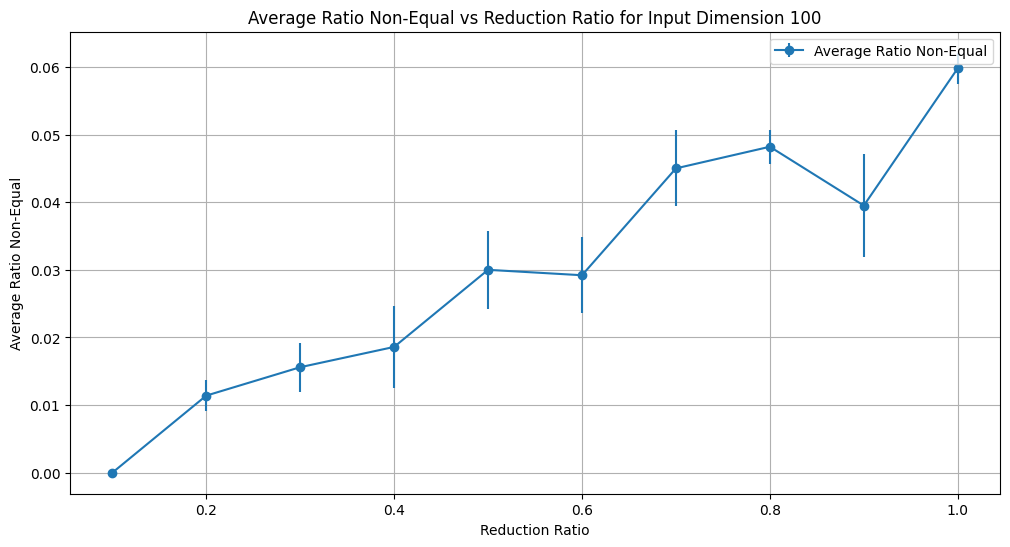

In [70]:
# Function to extract numerical value from tensor representation
def extract_value(tensor_str):
    if isinstance(tensor_str, str):
        return float(tensor_str.replace('tensor(', '').replace(')', ''))
    return tensor_str

# Apply the function to the tensor-like columns
df['average_ratio_non_equal'] = df['average_ratio_non_equal'].apply(extract_value)
df['std_dev_ratio_non_equal'] = df['std_dev_ratio_non_equal'].apply(extract_value)

# Fix the input dimension, e.g., 100
fixed_input_dimension = 100
df_filtered = df[df['input_dimension'] == fixed_input_dimension]

# Plot line graph for 'average_ratio_non_equal' with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(df_filtered['reduction_ratio'], df_filtered['average_ratio_non_equal'], yerr=df_filtered['std_dev_ratio_non_equal'], fmt='-o', label='Average Ratio Non-Equal')

plt.xlabel('Reduction Ratio')
plt.ylabel('Average Ratio Non-Equal')
plt.title(f'Average Ratio Non-Equal vs Reduction Ratio for Input Dimension {fixed_input_dimension}')
plt.legend()
plt.grid(True)
plt.show()


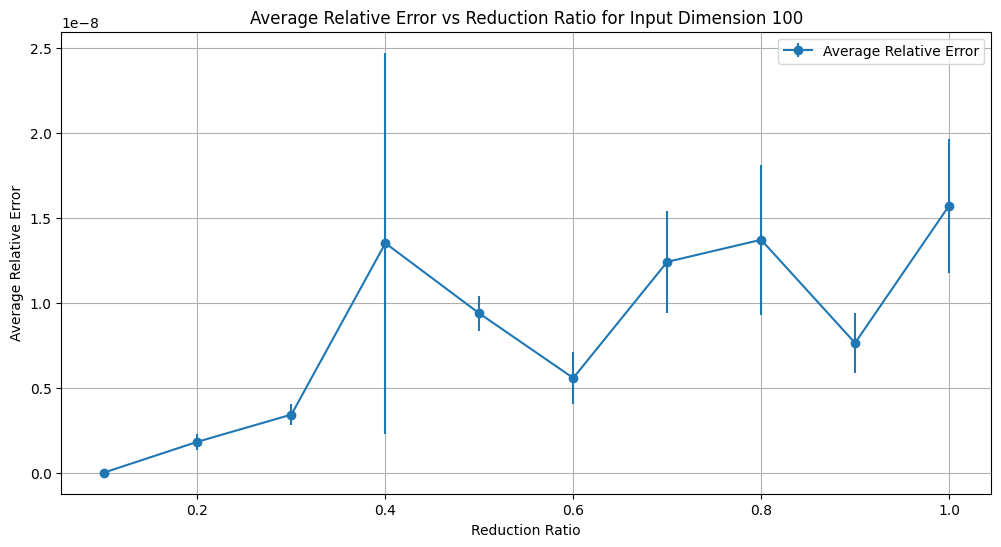

In [71]:
# Apply the function to the tensor-like columns
df['average_relative_error'] = df['average_relative_error'].apply(extract_value)
df['std_dev_relative_error'] = df['std_dev_relative_error'].apply(extract_value)

# Fix the input dimension, e.g., 100
fixed_input_dimension = 100
df_filtered = df[df['input_dimension'] == fixed_input_dimension]

# Plot line graph for 'average_relative_error' with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(df_filtered['reduction_ratio'], df_filtered['average_relative_error'], yerr=df_filtered['std_dev_relative_error'], fmt='-o', label='Average Relative Error')

plt.xlabel('Reduction Ratio')
plt.ylabel('Average Relative Error')
plt.title(f'Average Relative Error vs Reduction Ratio for Input Dimension {fixed_input_dimension}')
plt.legend()
plt.grid(True)
plt.show()
